In [236]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

In [237]:
filepath = '../data/DC_Properties.csv'
properties = pd.read_csv(filepath)

C:\Users\jim44\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [238]:
houses = properties[properties.SOURCE != 'Condominium']

In [239]:
houses = houses[houses.QUALIFIED != 'U']

In [280]:
houses = houses[houses.loc[:, 'PRICE'] > 50000]

In [241]:
#houses = houses[houses.loc[:, 'PRICE'] < 2000000]

In [242]:
houses = houses[pd.notnull(houses['AYB'])]

In [243]:
houses = houses[pd.notnull(houses['STORIES'])]

In [244]:
houses = houses[pd.notnull(houses['KITCHENS'])]

In [245]:
houses['YR_RMDL'] = houses.YR_RMDL.fillna(houses.AYB)

In [246]:
houses = houses[houses.loc[:, 'BATHRM'] != 0]

In [247]:
houses = houses[houses.loc[:, 'ROOMS'] != 0]

In [248]:
houses = houses[houses.loc[:, 'BEDRM'] != 0]

In [249]:
houses = houses[houses.loc[:, 'STORIES'] != 0]

In [250]:
houses = houses[houses.loc[:, 'KITCHENS'] != 0]

In [251]:
houses = houses[houses.loc[:, 'NUM_UNITS'] != 0]

In [252]:
houses = houses[houses.loc[:, 'AC'] != 0]

In [253]:
houses['SALEDATE'] = pd.to_datetime(houses['SALEDATE'])

In [254]:
houses['SALEDATE'] = houses['SALEDATE'].dt.year

In [255]:
houses = houses[houses.loc[:, 'SALEDATE'] > 2001]

In [256]:
#houses = houses[houses.loc[:, 'SALEDATE'] < 2018]

In [257]:
houses.shape

(38404, 49)

In [258]:
houses.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [259]:
columns = ['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS',
           'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
           'GBA', 'STRUCT', 'GRADE', 'CNDTN', 'FIREPLACES', 'LANDAREA', 'ASSESSMENT_NBHD', 'QUADRANT']
houses = houses.loc[:, columns]

In [260]:
houses.dtypes

BATHRM               int64
HF_BATHRM            int64
NUM_UNITS          float64
ROOMS                int64
BEDRM                int64
AYB                float64
YR_RMDL            float64
EYB                  int64
STORIES            float64
SALEDATE             int64
PRICE              float64
GBA                float64
STRUCT              object
GRADE               object
CNDTN               object
FIREPLACES           int64
LANDAREA             int64
ASSESSMENT_NBHD     object
QUADRANT            object
dtype: object

In [261]:
houses = pd.get_dummies(houses, columns=['STRUCT', 'GRADE', 'CNDTN', 'ASSESSMENT_NBHD', 'QUADRANT'], drop_first=True)

In [262]:
houses.columns

Index(['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL',
       'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'GBA', 'FIREPLACES', 'LANDAREA',
       'STRUCT_Multi', 'STRUCT_Row End', 'STRUCT_Row Inside',
       'STRUCT_Semi-Detached', 'STRUCT_Single', 'STRUCT_Town End',
       'STRUCT_Town Inside', 'GRADE_Average', 'GRADE_Excellent',
       'GRADE_Exceptional-A', 'GRADE_Exceptional-B', 'GRADE_Exceptional-C',
       'GRADE_Exceptional-D', 'GRADE_Fair Quality', 'GRADE_Good Quality',
       'GRADE_Superior', 'GRADE_Very Good', 'CNDTN_Excellent', 'CNDTN_Fair',
       'CNDTN_Good', 'CNDTN_Poor', 'CNDTN_Very Good',
       'ASSESSMENT_NBHD_American University', 'ASSESSMENT_NBHD_Anacostia',
       'ASSESSMENT_NBHD_Barry Farms', 'ASSESSMENT_NBHD_Berkley',
       'ASSESSMENT_NBHD_Brentwood', 'ASSESSMENT_NBHD_Brightwood',
       'ASSESSMENT_NBHD_Brookland', 'ASSESSMENT_NBHD_Burleith',
       'ASSESSMENT_NBHD_Capitol Hill', 'ASSESSMENT_NBHD_Central-tri 1',
       'ASSESSMENT_NBHD_C

In [263]:
houses.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,...,ASSESSMENT_NBHD_Spring Valley,ASSESSMENT_NBHD_Takoma Park,ASSESSMENT_NBHD_Trinidad,ASSESSMENT_NBHD_Wakefield,ASSESSMENT_NBHD_Wesley Heights,ASSESSMENT_NBHD_Woodley,ASSESSMENT_NBHD_Woodridge,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
count,38404.000000,38404.000000,38404.000000,38404.000000,38404.000000,38404.000000,38404.000000,38404.000000,38404.000000,38404.000000,...,38404.000000,38404.000000,38404.000000,38404.000000,38404.000000,38404.000000,38404.000000,38404.000000,38404.000000,38404.000000
mean,2.304473,0.695032,1.195292,7.435632,3.451542,1935.226096,1987.999011,1972.493022,2.147257,2011.475003,...,0.008983,0.007916,0.025622,0.003802,0.006510,0.002213,0.020258,0.484116,0.194407,0.010988
std,1.045794,0.591369,0.568357,2.220226,1.099801,32.163222,35.633846,16.930907,4.631806,4.901979,...,0.094356,0.088619,0.158008,0.061541,0.080421,0.046994,0.140884,0.499754,0.395749,0.104250
min,1.000000,0.000000,1.000000,2.000000,1.000000,1754.000000,20.000000,1936.000000,1.000000,2002.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,6.000000,3.000000,1913.000000,1968.000000,1964.000000,2.000000,2007.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,7.000000,3.000000,1928.000000,2005.000000,1967.000000,2.000000,2013.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,8.000000,4.000000,1947.000000,2012.000000,1978.000000,2.000000,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,12.000000,7.000000,6.000000,28.000000,20.000000,2018.000000,2019.000000,2018.000000,826.000000,2018.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [264]:
houses.head(10)

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,...,ASSESSMENT_NBHD_Spring Valley,ASSESSMENT_NBHD_Takoma Park,ASSESSMENT_NBHD_Trinidad,ASSESSMENT_NBHD_Wakefield,ASSESSMENT_NBHD_Wesley Heights,ASSESSMENT_NBHD_Woodley,ASSESSMENT_NBHD_Woodridge,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
0,4,0,2.0,8,4,1910.0,1988.0,1972,3.0,2003,...,0,0,0,0,0,0,0,1,0,0
2,3,1,2.0,9,5,1910.0,2009.0,1984,3.0,2016,...,0,0,0,0,0,0,0,1,0,0
3,3,1,2.0,8,5,1900.0,2003.0,1984,3.0,2006,...,0,0,0,0,0,0,0,1,0,0
5,3,2,1.0,10,5,1913.0,1913.0,1972,4.0,2010,...,0,0,0,0,0,0,0,1,0,0
7,3,1,2.0,8,4,1906.0,2011.0,1972,3.0,2011,...,0,0,0,0,0,0,0,1,0,0
8,3,1,2.0,7,3,1908.0,2008.0,1967,2.0,2018,...,0,0,0,0,0,0,0,1,0,0
14,3,1,2.0,5,3,1917.0,2000.0,1967,2.0,2011,...,0,0,0,0,0,0,0,1,0,0
16,3,1,1.0,8,3,1908.0,2006.0,1967,2.0,2010,...,0,0,0,0,0,0,0,1,0,0
22,1,0,1.0,6,3,1880.0,2010.0,1967,2.0,2006,...,0,0,0,0,0,0,0,1,0,0
23,2,1,1.0,5,3,1880.0,2010.0,1984,2.0,2012,...,0,0,0,0,0,0,0,1,0,0


In [265]:
houses.dtypes

BATHRM                                            int64
HF_BATHRM                                         int64
NUM_UNITS                                       float64
ROOMS                                             int64
BEDRM                                             int64
AYB                                             float64
YR_RMDL                                         float64
EYB                                               int64
STORIES                                         float64
SALEDATE                                          int64
PRICE                                           float64
GBA                                             float64
FIREPLACES                                        int64
LANDAREA                                          int64
STRUCT_Multi                                      uint8
STRUCT_Row End                                    uint8
STRUCT_Row Inside                                 uint8
STRUCT_Semi-Detached                            

In [281]:
target_col = houses.loc[:, 'PRICE']
feature_cols = houses.drop('PRICE', axis='columns')
y = target_col
X = feature_cols

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3, random_state=10)

In [282]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Test R-Squared:', lr.score(X_test, y_test))       
print('Training R-Squared:', lr.score(X_train, y_train))

Test R-Squared: 0.8144928448681121
Training R-Squared: 0.8459833532816271


In [283]:
y_pred = lr.predict(X)

print('Test MSE:', mean_squared_error(y_test, lr.predict(X_test)))
print('Training MSE:', mean_squared_error(y_train, lr.predict(X_train)))

print('Test RSME:', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))
print('Training RSME:', np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))

print('Test MAE:', mean_absolute_error(y_test, lr.predict(X_test)))
print('Training MAE:', mean_absolute_error(y_train, lr.predict(X_train)))

Test MSE: 65052093515.26165
Training MSE: 52676407603.79772
Test RSME: 255053.119007123
Training RSME: 229513.4148667518
Test MAE: 138126.50355118423
Training MAE: 134607.08651804604


In [269]:
kf = KFold(50, shuffle=True)
lr_grid = GridSearchCV(estimator=lr, param_grid={}, cv=kf, return_train_score=True)

lr_grid.fit(X, y)
results = lr_grid.cv_results_
print(results['mean_train_score'])
print(results['mean_test_score'])

[0.84102232]
[0.83589363]


In [270]:
linreg = lr_grid.best_estimator_
linreg.fit(X_train, y_train)
print('Test R-Squared:', linreg.score(X_test, y_test))       
print('Training R-Squared:', linreg.score(X_train, y_train))

Test R-Squared: 0.8217284589631906
Training R-Squared: 0.8475801830375564


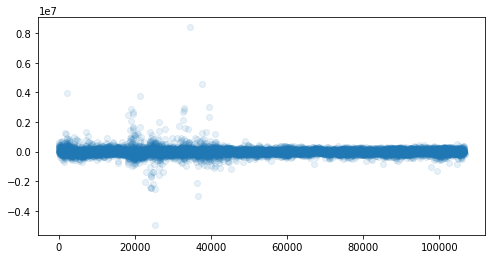

In [271]:
fig, ax = plt.subplots(figsize=(8,4))
residuals = y_test - linreg.predict(X_test)
ax.scatter(x=y_test.index, y=residuals, alpha=.1);

In [272]:
dtr = DecisionTreeRegressor(max_depth=100)
kf = KFold(25, shuffle=True, random_state=1)

dtr_grid = GridSearchCV(
    estimator=dtr,
    param_grid={},
    return_train_score=True,
    cv=kf,
)

dtr_grid.fit(X, y)
dtr_grid.cv_results_['mean_train_score'][0], dtr_grid.cv_results_['mean_test_score'][0]

(0.9999091082537415, 0.779257120337517)

In [273]:
dtreg = dtr_grid.best_estimator_
dtreg.fit(X_train, y_train)
print('Test R-Squared:', dtreg.score(X_test, y_test))       
print('Training R-Squared:', dtreg.score(X_train, y_train))

Test R-Squared: 0.7821386862358649
Training R-Squared: 0.9999703287522846


In [274]:
y_pred = dtreg.predict(X)

print('Test MSE:', mean_squared_error(y_test, dtreg.predict(X_test)))
print('Training MSE:', mean_squared_error(y_train, dtreg.predict(X_train)))

print('Test RSME:', np.sqrt(mean_squared_error(y_test, dtreg.predict(X_test))))
print('Training RSME:', np.sqrt(mean_squared_error(y_train, dtreg.predict(X_train))))

print('Test MAE:', mean_absolute_error(y_test, dtreg.predict(X_test)))
print('Training MAE:', mean_absolute_error(y_train, dtreg.predict(X_train)))

Test MSE: 73713895134.92572
Training MSE: 10302737.799609048
Test RSME: 271503.0296975076
Training RSME: 3209.787812240717
Test MAE: 137854.02127710136
Training MAE: 234.66548159327715


In [275]:
list(zip(feature_cols, dtreg.feature_importances_))

[('BATHRM', 0.005229533557429875),
 ('HF_BATHRM', 0.0024790459048265674),
 ('NUM_UNITS', 0.002304247308687119),
 ('ROOMS', 0.005708723318177872),
 ('BEDRM', 0.00299971129327943),
 ('AYB', 0.048177083418560904),
 ('YR_RMDL', 0.009603505656280898),
 ('EYB', 0.057318296438226495),
 ('STORIES', 0.0021819733320757426),
 ('SALEDATE', 0.05760144458708808),
 ('GBA', 0.5213590772985224),
 ('FIREPLACES', 0.007087493919564087),
 ('LANDAREA', 0.04723445537518092),
 ('STRUCT_Multi', 0.007527516575424387),
 ('STRUCT_Row End', 0.00042262897968343207),
 ('STRUCT_Row Inside', 0.0005102105898470403),
 ('STRUCT_Semi-Detached', 0.0007726010030393935),
 ('STRUCT_Single', 0.0021019861413544686),
 ('STRUCT_Town End', 1.4446195535556807e-06),
 ('STRUCT_Town Inside', 4.379749994928382e-06),
 ('GRADE_Average', 0.02888327466096866),
 ('GRADE_Excellent', 0.0038523353367050646),
 ('GRADE_Exceptional-A', 0.009338551339768348),
 ('GRADE_Exceptional-B', 0.013358483441611705),
 ('GRADE_Exceptional-C', 0.01007512829064

In [276]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9802584490678383
0.8757071046245197


In [277]:
y_pred = rfr.predict(X)

print('Test MSE:', mean_squared_error(y_test, rfr.predict(X_test)))
print('Training MSE:', mean_squared_error(y_train, rfr.predict(X_train)))

print('Test RSME:', np.sqrt(mean_squared_error(y_test,rfr.predict(X_test))))
print('Training RSME:', np.sqrt(mean_squared_error(y_train, rfr.predict(X_train))))

print('Test MAE:', mean_absolute_error(y_test, rfr.predict(X_test)))
print('Training MAE:', mean_absolute_error(y_train, rfr.predict(X_train)))

Test MSE: 42054797602.31178
Training MSE: 6854852379.758918
Test RSME: 205072.6642005506
Training RSME: 82794.0358948573
Test MAE: 96860.32395315617
Training MAE: 36080.901616801515


In [ ]:
kf = KFold(20, shuffle=True)

rfr_grid= GridSearchCV(
    estimator=RandomForestRegressor(n_estimators=100, random_state=1),
    param_grid={},
    cv=kf,
    return_train_score=True,
    )

rfr_grid.fit(X, y)
rfr_grid.cv_results_['mean_train_score'][0], rfr_grid.cv_results_['mean_test_score'][0]

In [284]:
fi = pd.DataFrame(list(zip(feature_cols, rfr.feature_importances_)))
fi = fi.sort_values(1, ascending=False)
fi

,0,1
10,GBA,0.528332
7,EYB,0.059261
9,SALEDATE,0.055995
5,AYB,0.043367
12,LANDAREA,0.034514
60,ASSESSMENT_NBHD_Georgetown,0.034387
20,GRADE_Average,0.027829
89,QUADRANT_NW,0.026486
11,FIREPLACES,0.026346
6,YR_RMDL,0.013027


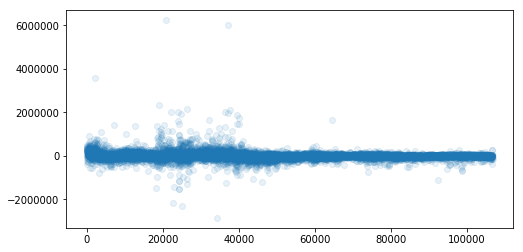

In [231]:
fig, ax = plt.subplots(figsize=(8,4))
residuals = y_test - rfr.predict(X_test)
ax.scatter(x=y_test.index, y=residuals, alpha=.1);

In [42]:
rfreg_b = RandomForestRegressor(
        n_estimators=500,
        oob_score=True,
        random_state=1)

rfreg_b.fit(X_train, y_train)
print('Test R-Squared:', rfreg_b.score(X_test, y_test))       
print('Training R-Squared:', rfreg_b.score(X_train, y_train))

Test R-Squared: 0.8981529008504977
Training R-Squared: 0.9798199272615054


In [44]:
y_pred = rfreg_b.predict(X)

print('Test MSE:', mean_squared_error(y_test, rfreg_b.predict(X_test)))
print('Training MSE:', mean_squared_error(y_train, rfreg_b.predict(X_train)))

print('Test RSME:', np.sqrt(mean_squared_error(y_test,rfreg_b.predict(X_test))))
print('Training RSME:', np.sqrt(mean_squared_error(y_train, rfreg_b.predict(X_train))))

print('Test MAE:', mean_absolute_error(y_test, rfreg_b.predict(X_test)))
print('Training MAE:', mean_absolute_error(y_train, rfreg_b.predict(X_train)))

Test MSE: 36972245422.9723
Training MSE: 7769961819.419777
Test RSME: 192281.68249464716
Training RSME: 88147.38691203373
Test MAE: 99151.49172246111
Training MAE: 37668.13496130345


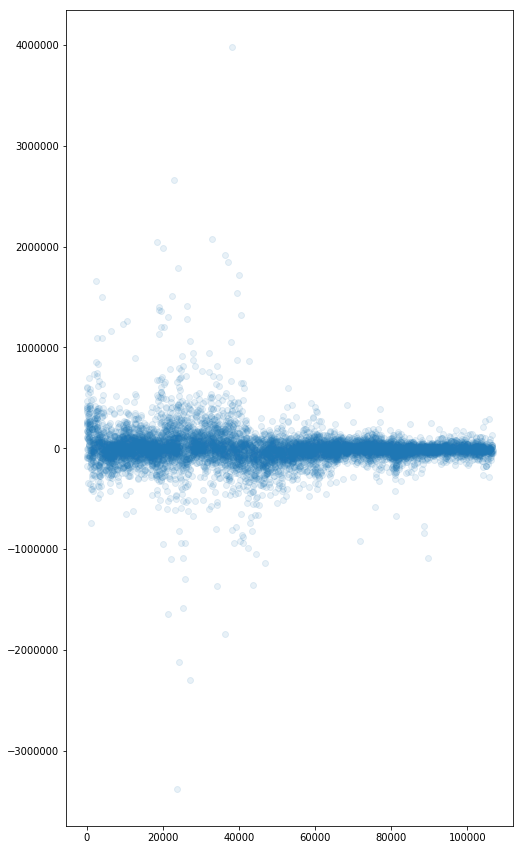

In [43]:
fig, ax = plt.subplots(figsize=(8,15))
residuals = y_test - rfreg_b.predict(X_test)
ax.scatter(x=y_test.index, y=residuals, alpha=.1);

In [58]:
fi2 = pd.DataFrame(list(zip(feature_cols, rfreg_b.feature_importances_)))

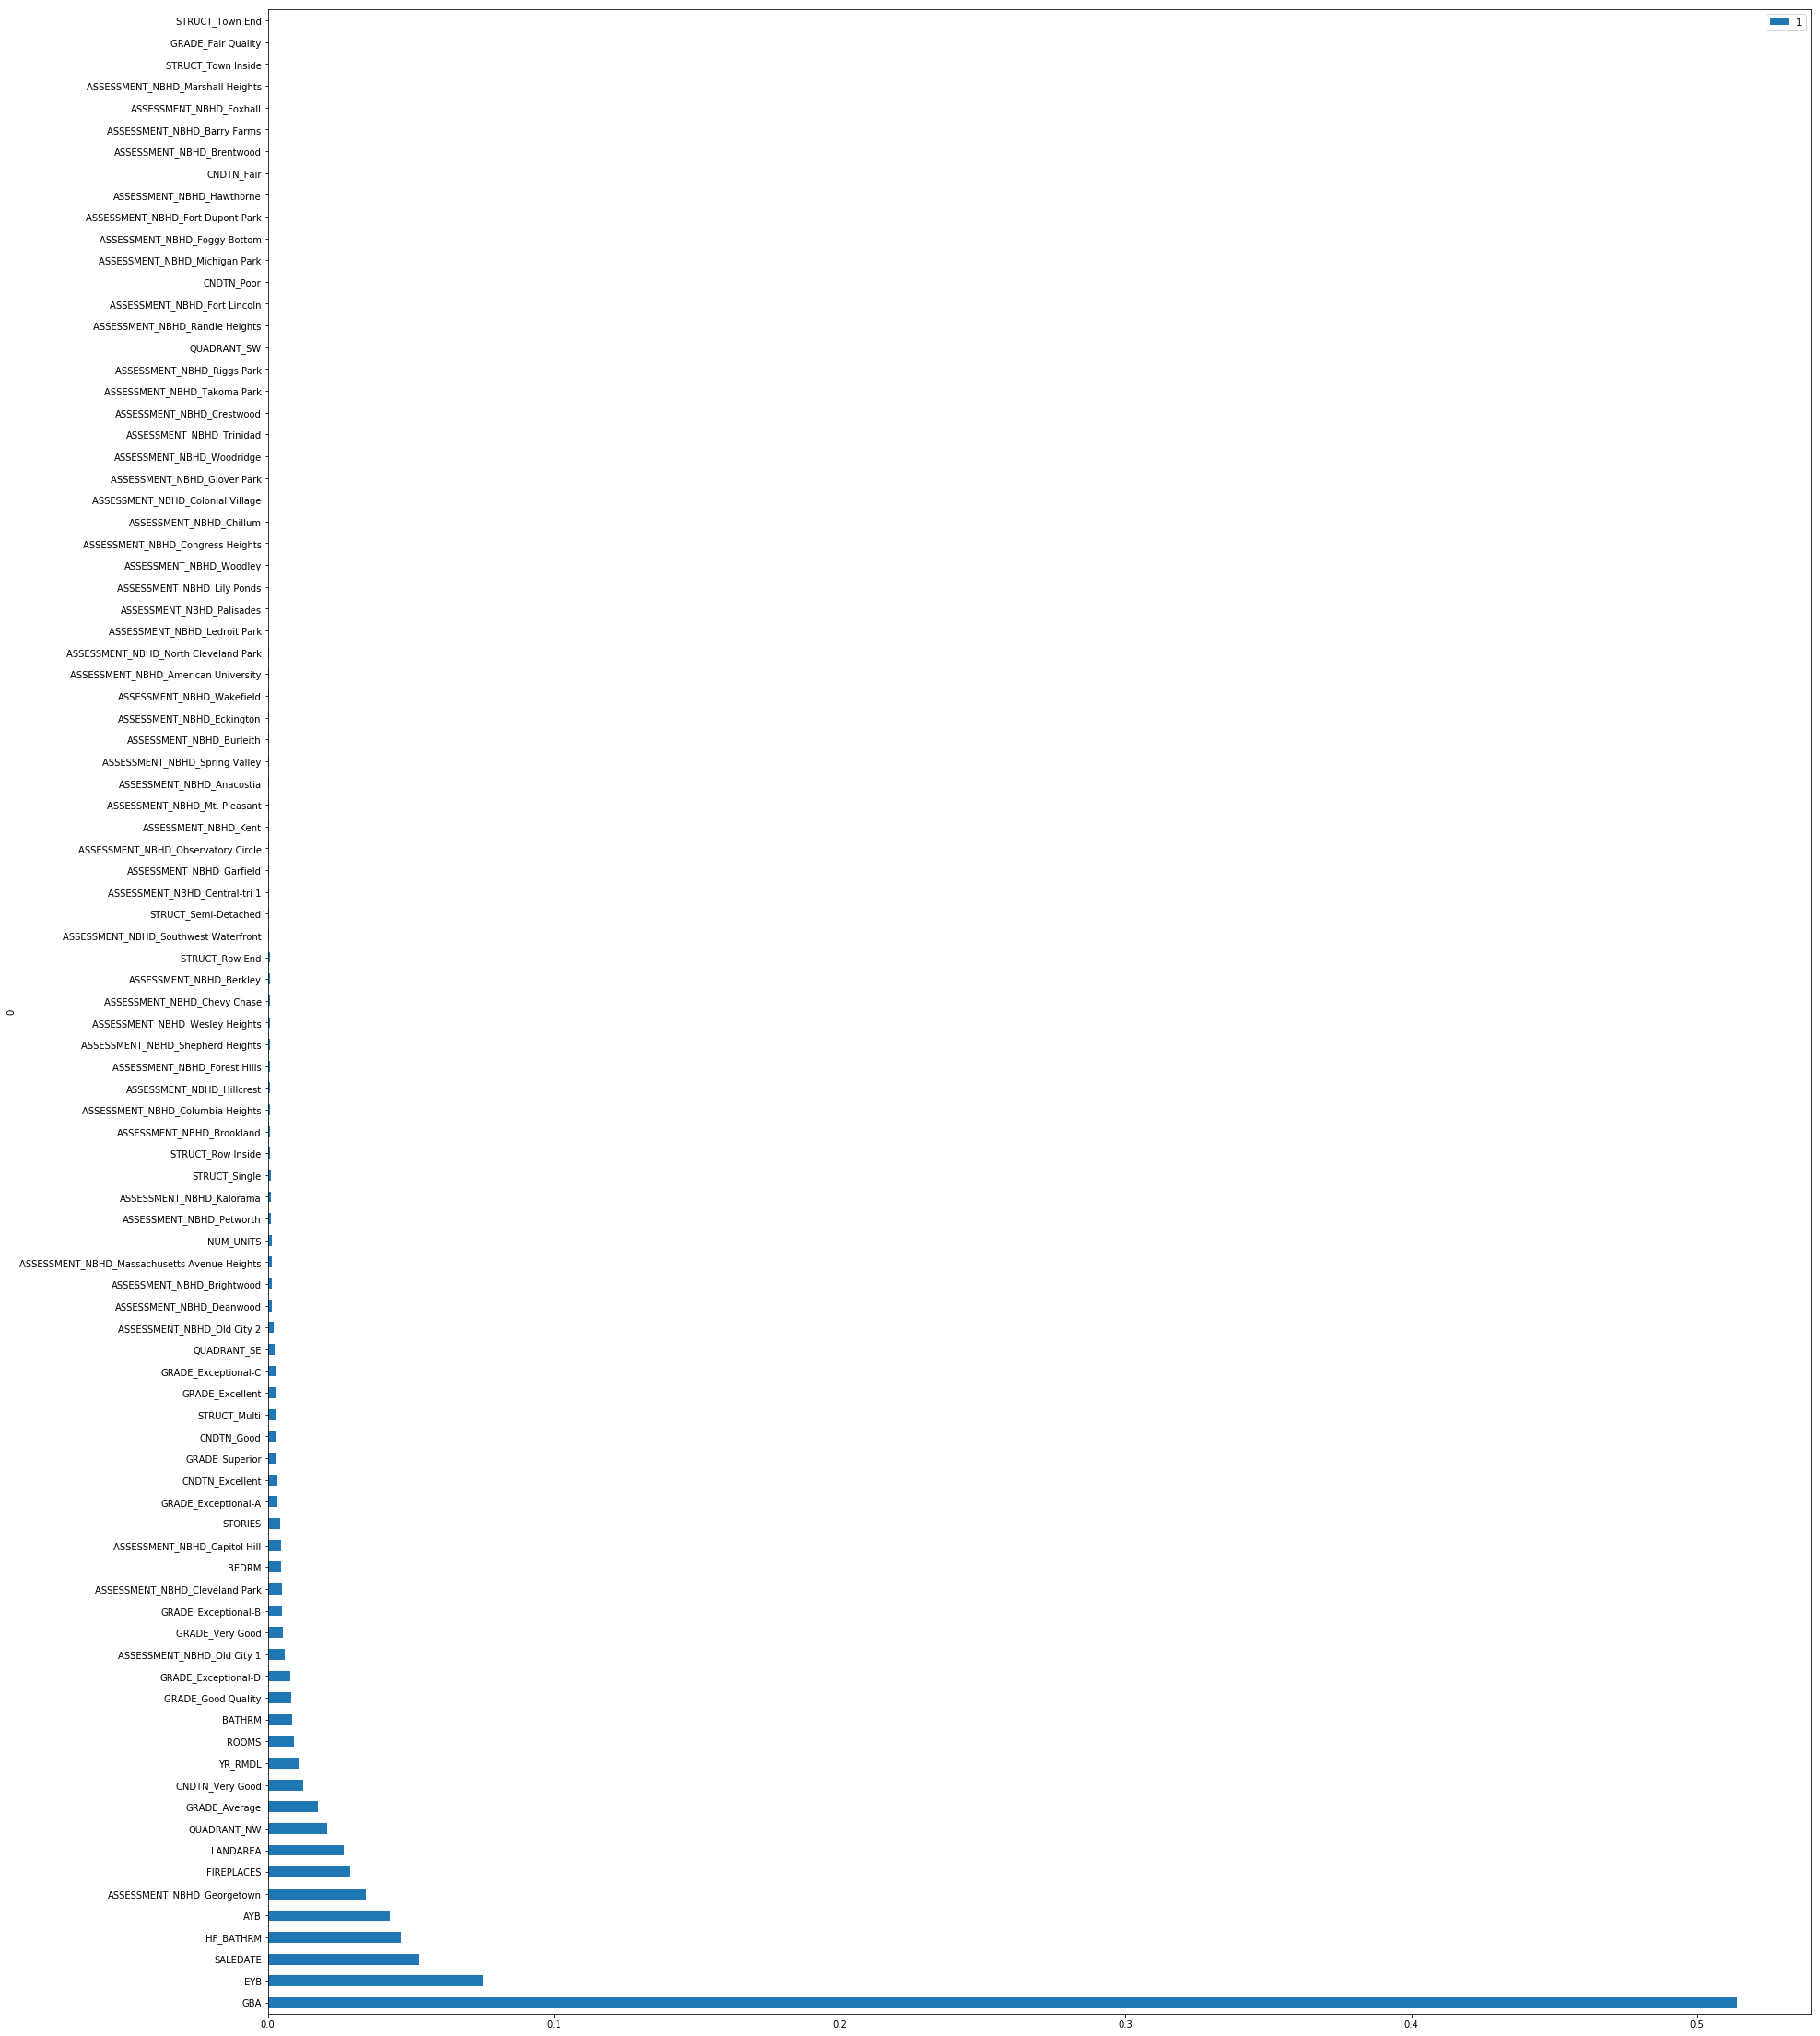

In [235]:
ax = fi.plot(kind='barh', x=0, y=1, figsize=(30,40))
ax.

In [171]:
houses_subset = houses.iloc[:, [11,90,1,7,61,5,13,9,]]

In [172]:
target_col = houses.loc[:, 'PRICE']
feature_cols2 = houses_subset
y = target_col
X2 = feature_cols2

X_train, X_test, y_train, y_test = train_test_split(X2, y, train_size=.7, test_size=.3, random_state=10)

In [173]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Test R-Squared:', lr.score(X_test, y_test))       
print('Training R-Squared:', lr.score(X_train, y_train))

Test R-Squared: 0.768686792214103
Training R-Squared: 0.7835527296854954


In [174]:
y_pred = lr.predict(X2)

print('Test MSE:', mean_squared_error(y_test, lr.predict(X_test)))
print('Training MSE:', mean_squared_error(y_train, lr.predict(X_train)))

print('Test RSME:', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))
print('Training RSME:', np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))

print('Test MAE:', mean_absolute_error(y_test, lr.predict(X_test)))
print('Training MAE:', mean_absolute_error(y_train, lr.predict(X_train)))

Test MSE: 83005837408.93843
Training MSE: 83764322580.10016
Test RSME: 288107.33661074727
Training RSME: 289420.6671613141
Test MAE: 179528.05972272484
Training MAE: 177396.0844770977


In [175]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9783654570520193
0.8736672390857491


In [121]:
rfreg_b = RandomForestRegressor(
        n_estimators=500,
        oob_score=True,
        random_state=1)

rfreg_b.fit(X_train, y_train)
print('Test R-Squared:', rfreg_b.score(X_test, y_test))       
print('Training R-Squared:', rfreg_b.score(X_train, y_train))

Test R-Squared: 0.8815113669830876
Training R-Squared: 0.9812235633987929


In [176]:
y_pred = rfr.predict(X2)

print('Test MSE:', mean_squared_error(y_test, rfr.predict(X_test)))
print('Training MSE:', mean_squared_error(y_train, rfr.predict(X_train)))

print('Test RSME:', np.sqrt(mean_squared_error(y_test,rfr.predict(X_test))))
print('Training RSME:', np.sqrt(mean_squared_error(y_train, rfr.predict(X_train))))

print('Test MAE:', mean_absolute_error(y_test, rfr.predict(X_test)))
print('Training MAE:', mean_absolute_error(y_train, rfr.predict(X_train)))

Test MSE: 45334015779.92362
Training MSE: 8372491053.985115
Test RSME: 212917.86158029022
Training RSME: 91501.31722541
Test MAE: 117525.47001138848
Training MAE: 44279.00066158557


In [177]:
houses.corr()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,...,ASSESSMENT_NBHD_Spring Valley,ASSESSMENT_NBHD_Takoma Park,ASSESSMENT_NBHD_Trinidad,ASSESSMENT_NBHD_Wakefield,ASSESSMENT_NBHD_Wesley Heights,ASSESSMENT_NBHD_Woodley,ASSESSMENT_NBHD_Woodridge,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
BATHRM,1.000000,0.113804,0.301649,0.634008,0.659655,0.107538,0.215458,0.339232,0.012330,-0.023499,...,0.131208,-0.020601,-0.028891,0.030791,0.090043,0.043906,0.009678,0.266511,-0.133179,-0.012292
HF_BATHRM,0.113804,1.000000,-0.161500,0.135531,0.143770,0.149963,0.150844,0.332380,0.029762,-0.054240,...,0.052045,0.010433,-0.076253,0.009403,0.066732,0.018085,-0.025481,0.111953,-0.071539,-0.016587
NUM_UNITS,0.301649,-0.161500,1.000000,0.466957,0.311638,-0.125889,-0.044662,-0.133316,0.005210,0.016717,...,-0.030225,-0.030423,0.114595,-0.018966,-0.024190,-0.013514,-0.040543,-0.042242,0.033804,0.030460
ROOMS,0.634008,0.135531,0.466957,1.000000,0.676787,0.031621,0.038721,0.143814,0.014674,0.006689,...,0.092982,-0.029385,0.047467,0.015407,0.037322,0.035084,-0.036024,0.210652,-0.075413,0.004018
BEDRM,0.659655,0.143770,0.311638,0.676787,1.000000,-0.003097,0.059340,0.149296,0.014224,-0.011715,...,0.107087,-0.018519,-0.014533,0.024140,0.043172,0.038981,0.020595,0.271731,-0.141951,-0.033728
AYB,0.107538,0.149963,-0.125889,0.031621,-0.003097,1.000000,0.112238,0.683579,0.000704,-0.001401,...,0.058506,0.098889,-0.028074,0.007732,0.059027,0.009956,-0.006718,-0.224976,0.161219,0.069347
YR_RMDL,0.215458,0.150844,-0.044662,0.038721,0.059340,0.112238,1.000000,0.358833,0.008828,-0.077338,...,-0.009699,0.009787,-0.035353,-0.005353,-0.006291,0.000986,0.004504,-0.087462,0.070689,-0.002737
EYB,0.339232,0.332380,-0.133316,0.143814,0.149296,0.683579,0.358833,1.000000,0.026447,-0.060858,...,0.064264,0.053389,-0.107054,-0.016484,0.079492,0.020866,-0.045136,-0.021285,0.086344,0.016288
STORIES,0.012330,0.029762,0.005210,0.014674,0.014224,0.000704,0.008828,0.026447,1.000000,0.002561,...,-0.000863,-0.004672,-0.004888,-0.000002,0.003943,0.000992,-0.006564,0.007006,-0.006267,-0.000780
SALEDATE,-0.023499,-0.054240,0.016717,0.006689,-0.011715,-0.001401,-0.077338,-0.060858,0.002561,1.000000,...,-0.001890,0.003357,0.032215,-0.010080,-0.003877,-0.016788,0.029806,-0.053748,0.006586,0.016152


In [278]:
avg_price_year = houses.groupby('SALEDATE')['PRICE'].mean()

Text(0, 0.5, 'Year Sold')

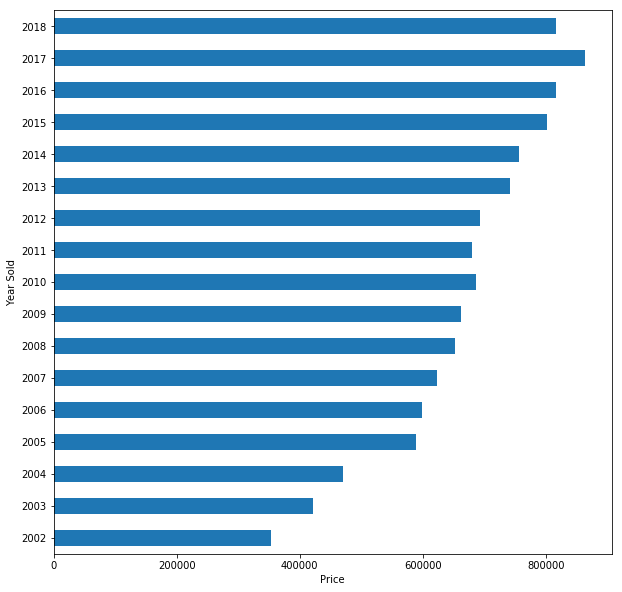

In [279]:
ax = avg_price_year.plot(kind='barh', figsize=(10,10))
ax.set_xlabel('Price')
ax.set_ylabel('Year Sold')